# Research Skills: Image Analysis 
## Take-home Assignment - Part 1 
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Academic Year 2022-2023

Your First Name: Ela 

Your Last Name: Guven

Your Student ID: 2067608

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

## Part 1: Image smoothing in the spatial and frequency domain

1. (5 points) Read in the color image you have been provided.  Convert the image to grayscale. Display the image with a grayscale colormap and an appropriate title. 

Points breakdown: 3 points for converting the color image to gray, 2 points for displaying your image.

Text(0.5, 1.0, 'Grayscaled color image')

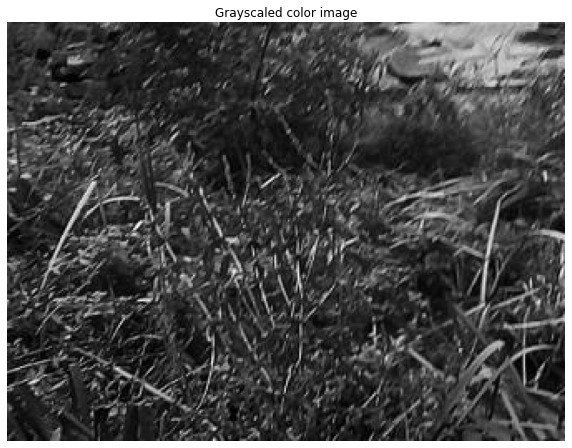

In [34]:
# Import packages 
from skimage import io, color
import numpy as np
import matplotlib.pylab as plt 
import numpy as np
from PIL import Image
import numpy as np
%matplotlib inline

# Read Image
im_color = io.imread("2067608/2067608_rgbimage.jpg") 

# Convert Image to Grayscale 
im_gray = color.rgb2gray(im_color)

# Display the Grayscale image
plt.figure(figsize=(10,10)) 
plt.imshow(im_gray, cmap = 'gray')
plt.axis('off')
plt.title('Grayscaled color image')

2. (5 points) Add 10\% salt and pepper noise to the grayscale image.

Text(0.5, 1.0, 'Grayscaled color image')

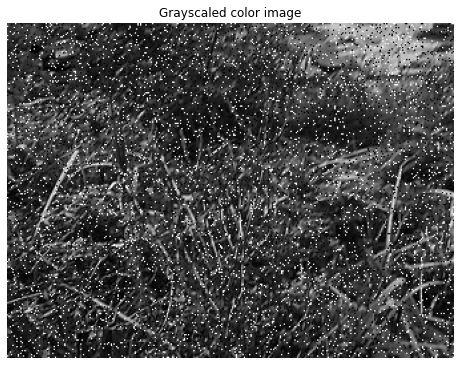

In [35]:
from skimage.util import random_noise, img_as_float

# Add 10% Salt & Pepper Noise 
seed = 42
im_sandp = random_noise(im_gray, seed=seed, mode='s&p', amount=0.10)
plt.figure(figsize=(8,8)) 
plt.imshow(im_sandp, cmap = 'gray')
plt.axis('off')
plt.title('Grayscaled color image')

3. (5 points) Denoise the noisy image by performing a Gaussian blur with `sigma=1` in the spatial domain. Display your denoised image.  

Points breakdown: 3 points for denosing the image, 2 points for displaying your image.

Text(0.5, 1.0, 'Gaussian Blur, sigma = 1')

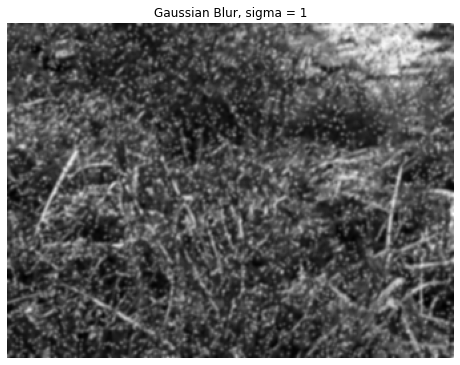

In [36]:
import scipy.ndimage.filters

# Perform Gaussian blur with sigma = 1 in the Spatial Domain
im_Gauss = scipy.ndimage.gaussian_filter(im_sandp, sigma=1)

# Display the Denoised Imahe 
plt.figure(figsize=(8,8)) 
plt.imshow(im_Gauss, cmap = 'gray')
plt.axis('off')
plt.title('Gaussian Blur, sigma = 1') 

4. (5 points) Convert both the "clean" grayscale image (output of Q1.1) and noisy image (output of Q1.2) to the frequency domain and display the two FFT spectrums (FFT magnitude).

Points breakdown: 2 points for converting to the frequency domain, 3 point for displaying the FFT spectrum.

Text(0.5, 1.0, 'Converted Original Image')

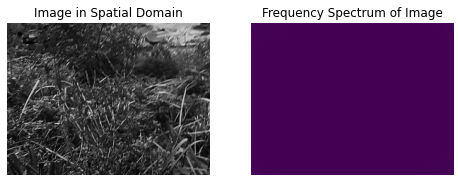

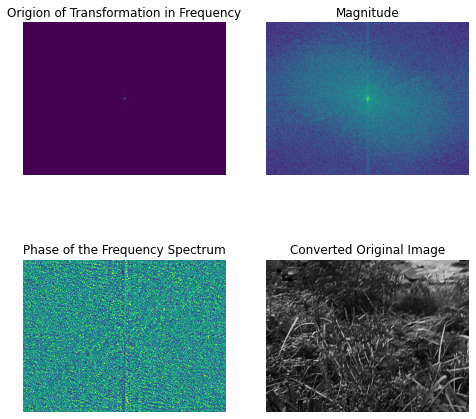

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from skimage import io 
%matplotlib inline


F = fftn(im_gray)
S = abs(F) #magnitude 

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(im_gray,cmap='gray')
plt.axis ("off")
plt.title ("Image in Spatial Domain")

plt.subplot(2,2,2) 
plt.imshow(S)
plt.axis('off')
plt.title('Frequency Spectrum of Image')


# fftshift moves the origin of the transform to the center of the frequency rectangle. 
Fc = fftshift(F)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1), 
plt.imshow(abs(Fc)) 
plt.axis('off')
plt.title('Origion of Transformation in Frequency')

# A log transformation allows better visual details 
S2 = np.log(1 + abs(Fc));
plt.subplot(2,2,2), 
plt.imshow(S2);
plt.axis('off')
plt.title('Magnitude')

# phase
pFc = np.angle(Fc);  
plt.subplot(2,2,3), 
plt.imshow(pFc);
plt.axis('off')
plt.title('Phase of the Frequency Spectrum')

# convert back 
im2 = ifftn(F)
plt.subplot(2,2,4), 
plt.imshow(np.real(im2),cmap='gray');
plt.axis('off')
plt.title('Converted Original Image')

Text(0.5, 1.0, 'Converted Original Image')

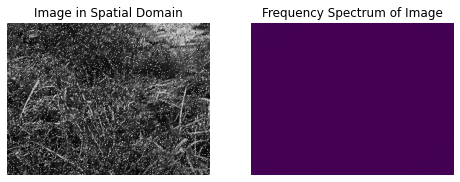

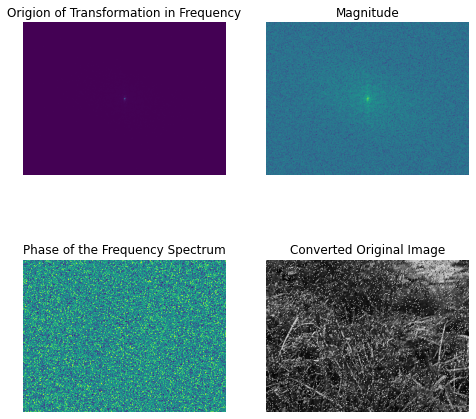

In [38]:
F = fftn(im_sandp)
S = abs(F) #magnitude 

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(im_sandp,cmap='gray')
plt.axis ("off")
plt.title ("Image in Spatial Domain")

plt.subplot(2,2,2) 
plt.imshow(S)
plt.axis('off')
plt.title('Frequency Spectrum of Image')


# fftshift moves the origin of the transform to the center of the frequency rectangle. 
Fc = fftshift(F)

plt.figure(figsize=(8,8))
plt.subplot(2,2,1), 
plt.imshow(abs(Fc)) 
plt.axis('off')
plt.title('Origion of Transformation in Frequency')

# A log transformation allows better visual details 
S2 = np.log(1 + abs(Fc));
plt.subplot(2,2,2), 
plt.imshow(S2);
plt.axis('off')
plt.title('Magnitude')

# phase
pFc = np.angle(Fc);  
plt.subplot(2,2,3), 
plt.imshow(pFc);
plt.axis('off')
plt.title('Phase of the Frequency Spectrum')

# convert back 
im2 = ifftn(F)
plt.subplot(2,2,4), 
plt.imshow(np.real(im2),cmap='gray');
plt.axis('off')
plt.title('Converted Original Image')

5. (5 points) Denoise the noisy image in frequency space by performing a Gaussian blur with `sigma=1` in the frequency domain. Convert your denoised solution back to the spatial domain. Display your denoised image. 

Points breakdown: 2 points for denoising. 2 points for converting your solution to the spatial domain,
1 point for displaying the image.

Text(0.5, 1.0, 'Denoised Image')

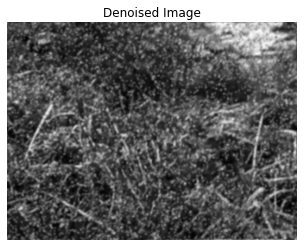

In [39]:
import numpy as np
from scipy import signal
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift

# Frequency domain of the noisy image 
F = fftn(im_sandp)

# Create a Gaussian kernel and a Frequency kernel
gaussian_kernel = np.outer(signal.gaussian(F.shape[0], 1), signal.gaussian(F.shape[1], 1))
frequency_kernel = fftn(ifftshift(gaussian_kernel))
# Multiply the noisy image (frequency domain) with the frequency kernel
i = F*frequency_kernel

# Converting denoised to spatial domain
i_spatial = ifftn(i).real

# Display the image
plt.imshow(i_spatial,cmap='gray')
plt.axis("off")
plt.title("Denoised Image")

6. (10 points) Compare the time taken to run Gaussian blur operations in the spatial domain vs the frequency domain for the following 6 values of `sigma` - 1,2,4,16,32,64 and 128. Plot the time taken vs sigma for both spatial and frequency domain in the same plot. 

Points breakdown: 3 points for running the operations in the spatial domain. 3 points for running
the operations in the frequency domain. 1 point for the plot.

Text(0.5, 1.0, 'Time needed to compute Gaussian blur in spatial & frequency domain per r')

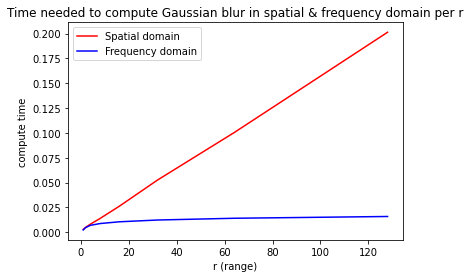

In [40]:
import timeit

r = 1, 2, 4, 8, 16, 32, 64, 128

#computing time in spatial domain
def spatial():
    x = []
    start_time_spatial = timeit.default_timer()
    for i in r: 
        scipy.ndimage.gaussian_filter(im_sandp, sigma = i)
        
        x.append(timeit.default_timer()-start_time_spatial)
    return x

#computing time in frequency domain
def frequency():
    y = []
    start_time_spatial = timeit.default_timer()
    for i in r: 
        j = np.outer(signal.gaussian(im_freq.shape[0], i), 
                 signal.gaussian(im_freq.shape[1], i))
        k = fftn(ifftshift(j))
        s = im_freq*freq_kernel
        p = ifftn(s).real 
        
        y.append(timeit.default_timer()-start_time_spatial)
    return y
    
plt.plot(r, spatial(), color = 'r', label = 'spatial domain')
plt.plot(r, frequency(), color = 'b', label = 'frequency domain')
plt.legend(labels=['Spatial domain','Frequency domain'])

plt.xlabel("r (range)")
plt.ylabel("compute time")
plt.title("Time needed to compute Gaussian blur in spatial & frequency domain per r")

Briefly comment on your plot. When `sigma` is larger, the kernel is larger. Which domain is perfered for for larger kernels? 

Points breakdown: 2 points for your comment on the plot and answering the question.

It can be see that the time taken to run Gaussian blur operations in the spatial domain increases significantly with increasing values of sigma. However, in the frequency domain, the time taken remains relatively constant for all values of sigma. Therefore, the frequency domain is preferred for larger kernels as it can significantly reduce the computational time required to perform the operation compared to the spatial domain.